In [9]:
# import main libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [10]:
df = pd.read_csv('df_final.csv')

In [11]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
df.dtypes

id                               object
name                             object
disc_number                       int64
duration_ms                       int64
explicit                           bool
popularity                        int64
track_number                      int64
artists                          object
album_type                       object
album_name                       object
album_release_date               object
album_release_date_precision     object
album_total_tracks                int64
danceability                    float64
energy                          float64
key                               int64
loudness                        float64
mode                              int64
speechiness                     float64
acousticness                    float64
instrumentalness                float64
liveness                        float64
valence                         float64
tempo                           float64
features_duration_ms              int64


In [ ]:
df_new =df.copy()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# fit and transform the 'album_type' column
df_new['album_type'] = label_encoder.fit_transform(df_new['album_type'])
df_new['genre'] = label_encoder.fit_transform(df_new['genre'])
df_new['explicit'] = label_encoder.fit_transform(df_new['explicit'])

In [14]:
no_use = ['id', 'name', 'disc_number', 'duration_ms', 'track_number', 
          'artists', 'album_name', 'album_release_date', 'album_release_date_precision',
          'album_total_tracks','month_year','year1']
df_new = df_new.drop(no_use, axis=1)

In [15]:
df_new

,explicit,popularity,album_type,danceability,energy,key,loudness,mode,speechiness,acousticness,...,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre,popularity_art,followers
0,0,52,0,0.532,0.517,0,-9.846,1,0.4930,0.54700,...,275.90530,0.020,1.000,0.500,0.525,705.0,234.0,73,51.000000,2.188180e+05
1,0,45,0,0.750,0.340,5,-12.759,0,0.0326,0.16700,...,517.28253,0.678,0.326,0.410,0.589,1074.0,269.0,73,47.000000,2.316130e+05
2,0,39,0,0.801,0.639,7,-10.681,0,0.1040,0.02900,...,259.04180,0.847,0.457,0.904,0.760,516.0,171.0,73,44.000000,1.008280e+05
3,0,0,2,0.675,0.543,6,-11.983,0,0.0639,0.04840,...,387.41360,0.882,0.498,0.512,0.503,826.0,207.0,73,38.000000,1.483065e+05
4,0,0,1,0.761,0.671,11,-13.346,0,0.0418,0.51300,...,239.63574,0.882,1.000,0.474,0.459,493.0,123.0,73,45.000000,2.458390e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89555,1,23,2,0.466,0.982,5,-2.674,0,0.0752,0.00841,...,200.10376,0.729,1.000,0.088,0.182,585.0,145.0,30,71.666667,1.162675e+07
89556,1,56,2,0.666,0.720,9,-4.483,1,0.0269,0.37100,...,200.98611,0.712,1.000,0.395,0.535,339.0,84.0,30,47.000000,4.618400e+04
89557,1,80,0,0.813,0.627,11,-5.018,0,0.0486,0.07710,...,189.48643,0.814,0.990,0.097,0.330,417.0,106.0,30,82.500000,1.517423e+07
89558,0,60,2,0.653,0.779,0,-3.133,1,0.0392,0.37200,...,197.41605,0.650,1.000,0.545,0.604,359.0,89.0,30,42.500000,3.855350e+04


In [16]:
df_final = df_new.copy()

# Visual Approach

## Automatic Boxplot

In [17]:
df_new_iqr = df_new.copy()

In [18]:
X_iqr = df_new_iqr.values

In [19]:
scaler = StandardScaler()
df_transformed_iqr = scaler.fit_transform(X_iqr)

In [21]:
def is_outlier(x, k=1.5):
    q1 = np.quantile(x, 0.25)
    q3 = np.quantile(x, 0.75)
    iqr = q3 - q1
    outliers = list()
    for v in x:
        if v < q1 - k * iqr or v > q3 + k * iqr:
            outliers.append(True)
        else:
            outliers.append(False)
    return np.array(outliers)

In [22]:
outliers_iqr = is_outlier(df_transformed_iqr[:,0], k=1.8)
np.unique(outliers_iqr, return_counts=True)

(array([False,  True]), array([81783,  7777], dtype=int64))

Because the amount of outliers are higher than 1% of threshold. It does not match the requirement of score-based outliers. Therefore, we need to 
conduct further analysis 

# Model-based Approaches

## Isolation Forest

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
df_new_if = df_new.copy()

In [25]:
X_if = df_new_if.values

In [26]:
X_if.shape 

(89560, 26)

In [27]:
scaler = StandardScaler()
df_transformed_if = scaler.fit_transform(X_if)
b_if = pd.DataFrame(df_transformed_if, columns= df_new_if.columns)

In [28]:
# define IsolationForest
clf_if = IsolationForest(
    random_state=0, contamination=0.01
)

In [29]:
# fit IsolationForest
clf_if.fit(df_transformed_if)

IsolationForest(contamination=0.01, random_state=0)

In [30]:
# get outliers for training- and test-set
outliers_if = clf_if.predict(df_transformed_if)

In [31]:
# get outliers number for training-set
np.unique(outliers_if, return_counts=True)

(array([-1,  1]), array([  896, 88664], dtype=int64))

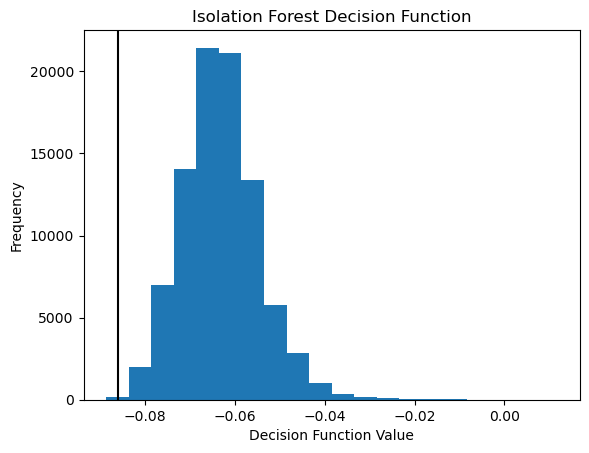

In [32]:
plt.hist(clf_if.decision_function(X_if), bins=20)
plt.axvline(np.min(clf_if.decision_function(X_if)[np.where(outliers_if == -1)]), c='k')
plt.xlabel('Decision Function Value')
plt.ylabel('Frequency')
plt.title('Isolation Forest Decision Function')
plt.show()

In [33]:
b_if['outlier_if'] = outliers_if 
b_if['outlier_if'] = b_if['outlier_if'].apply(lambda x: 'inlier' if x==1 else 'outlier')

In [34]:
df_final['outlier_if'] = outliers_if 
df_final['outlier_if'] = df_final['outlier_if'].apply(lambda x: 'inlier' if x==1 else 'outlier')

In [35]:
df_final

,explicit,popularity,album_type,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre,popularity_art,followers,outlier_if
0,0,52,0,0.532,0.517,0,-9.846,1,0.4930,0.54700,...,0.020,1.000,0.500,0.525,705.0,234.0,73,51.000000,2.188180e+05,inlier
1,0,45,0,0.750,0.340,5,-12.759,0,0.0326,0.16700,...,0.678,0.326,0.410,0.589,1074.0,269.0,73,47.000000,2.316130e+05,inlier
2,0,39,0,0.801,0.639,7,-10.681,0,0.1040,0.02900,...,0.847,0.457,0.904,0.760,516.0,171.0,73,44.000000,1.008280e+05,inlier
3,0,0,2,0.675,0.543,6,-11.983,0,0.0639,0.04840,...,0.882,0.498,0.512,0.503,826.0,207.0,73,38.000000,1.483065e+05,inlier
4,0,0,1,0.761,0.671,11,-13.346,0,0.0418,0.51300,...,0.882,1.000,0.474,0.459,493.0,123.0,73,45.000000,2.458390e+05,inlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89555,1,23,2,0.466,0.982,5,-2.674,0,0.0752,0.00841,...,0.729,1.000,0.088,0.182,585.0,145.0,30,71.666667,1.162675e+07,inlier
89556,1,56,2,0.666,0.720,9,-4.483,1,0.0269,0.37100,...,0.712,1.000,0.395,0.535,339.0,84.0,30,47.000000,4.618400e+04,inlier
89557,1,80,0,0.813,0.627,11,-5.018,0,0.0486,0.07710,...,0.814,0.990,0.097,0.330,417.0,106.0,30,82.500000,1.517423e+07,inlier
89558,0,60,2,0.653,0.779,0,-3.133,1,0.0392,0.37200,...,0.650,1.000,0.545,0.604,359.0,89.0,30,42.500000,3.855350e+04,inlier


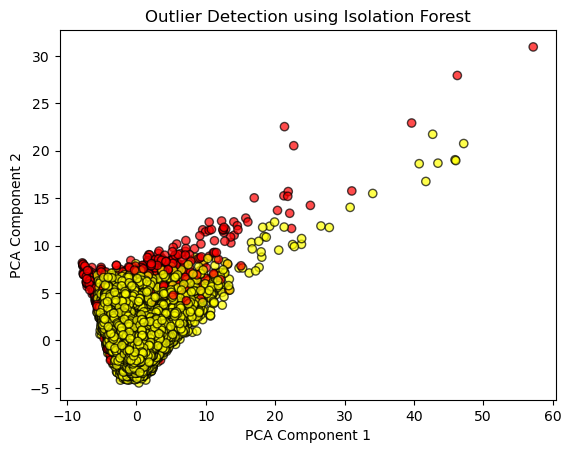

In [ ]:
numeric_data_if = df_transformed_if  # this is a numeric DataFrame/array without the 'outlier_KNN' column
pca = PCA(n_components=2)
df_2d_if = pca.fit_transform(numeric_data_if)
color_map = {'inlier': 'yellow', 'outlier': 'red'}
colors = b_if['outlier_if'].map(color_map)

# plot the data points on a scatter plot
plt.scatter(df_2d_if[:, 0], df_2d_if[:, 1], c=colors, edgecolor='k', alpha=0.7)
plt.title('Outlier Detection using Isolation Forest')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

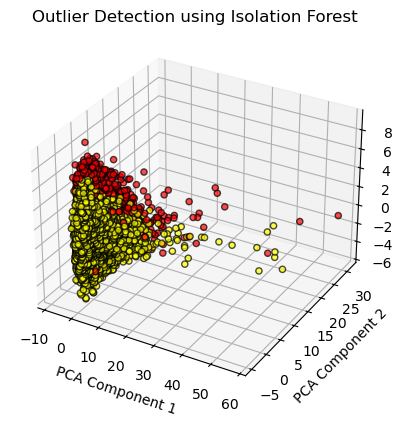

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# assume df_transformed_lof and b_lof are already defined

numeric_data_if = df_transformed_if  # this is a numeric DataFrame/array without the 'outlier_KNN' column

# apply PCA to reduce the dimensions to 3
pca = PCA(n_components=3)
df_3d_if = pca.fit_transform(numeric_data_if)

color_map = {'inlier': 'yellow', 'outlier': 'red'}
colors = b_if['outlier_if'].map(color_map)

# create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df_3d_if[:, 0], df_3d_if[:, 1], df_3d_if[:, 2], c=colors, edgecolor='k', alpha=0.7)

ax.set_title('Outlier Detection using Isolation Forest')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.show()

# Density based outlier

## LOF

In [38]:
from pyod.models.lof import LOF

In [39]:
df_lof = df_new.copy()

In [40]:
X_lof = df_lof.values
X_lof.shape 

(89560, 26)

In [41]:
scaler = StandardScaler()
df_transformed_lof = scaler.fit_transform(X_lof)
b_lof = pd.DataFrame(df_transformed_lof, columns= df_lof.columns)

In [42]:
clf_lof = LOF(contamination = 0.01)
clf_lof.fit(df_transformed_lof)

LOF(algorithm='auto', contamination=0.01, leaf_size=30, metric='minkowski',
  metric_params=None, n_jobs=1, n_neighbors=20, novelty=True, p=2)

In [43]:
outliers = clf_lof.predict(df_transformed_lof)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([88868,   692], dtype=int64))

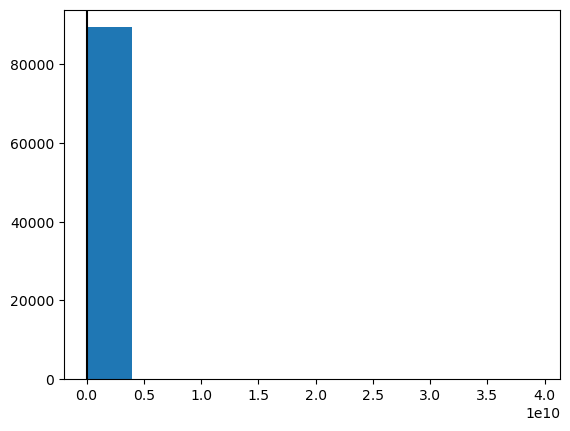

In [44]:
plt.hist(clf_lof.decision_scores_, bins=10)
plt.axvline(np.min(clf_lof.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

In [45]:
b_lof['outlier_lof'] = outliers 
b_lof['outlier_lof'] = b_lof['outlier_lof'].apply(lambda x: 'inlier' if x==0 else 'outlier')

In [46]:
df_final['outlier_lof'] = outliers
df_final['outlier_lof'] = df_final['outlier_lof'].apply(lambda x: 'inlier' if x==0 else 'outlier')

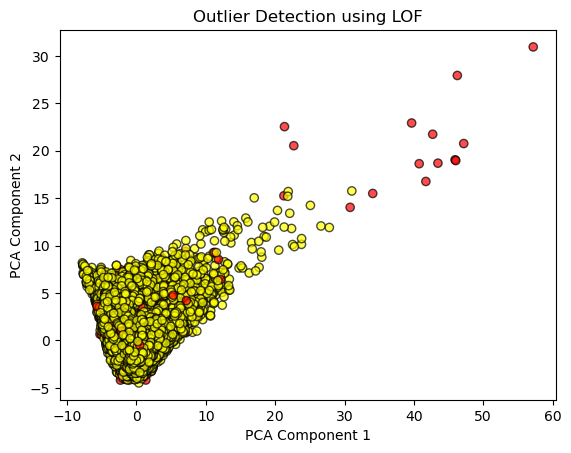

In [ ]:
numeric_data_lof = df_transformed_lof  
pca = PCA(n_components=2)
df_2d_lof = pca.fit_transform(numeric_data_lof)
color_map = {'inlier': 'yellow', 'outlier': 'red'}
colors = b_lof['outlier_lof'].map(color_map)

# plot on a scatter plot
plt.scatter(df_2d_lof[:, 0], df_2d_lof[:, 1], c=colors, edgecolor='k', alpha=0.7)
plt.title('Outlier Detection using LOF')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

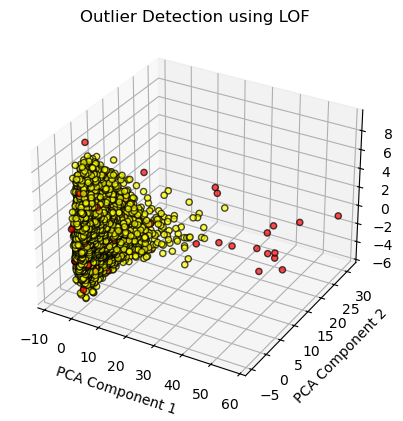

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# the numeric data is used for PCA
numeric_data_lof = df_transformed_lof  # this is a numeric DataFrame/array without the 'outlier_KNN' column

# apply PCA to reduce the dimensions to 3
pca = PCA(n_components=3)
df_3d_lof = pca.fit_transform(numeric_data_lof)

color_map = {'inlier': 'yellow', 'outlier': 'red'}
colors = b_lof['outlier_lof'].map(color_map)

# create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df_3d_lof[:, 0], df_3d_lof[:, 1], df_3d_lof[:, 2], c=colors, edgecolor='k', alpha=0.7)

ax.set_title('Outlier Detection using LOF')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.show()

## DBSCAN

In [49]:
df_new_db = df_new.copy()

In [50]:
X_db = df_new_db.values
X_db.shape 

(89560, 26)

In [51]:
X_db

array([[0.00000000e+00, 5.20000000e+01, 0.00000000e+00, ...,
        7.30000000e+01, 5.10000000e+01, 2.18818000e+05],
       [0.00000000e+00, 4.50000000e+01, 0.00000000e+00, ...,
        7.30000000e+01, 4.70000000e+01, 2.31613000e+05],
       [0.00000000e+00, 3.90000000e+01, 0.00000000e+00, ...,
        7.30000000e+01, 4.40000000e+01, 1.00828000e+05],
       ...,
       [1.00000000e+00, 8.00000000e+01, 0.00000000e+00, ...,
        3.00000000e+01, 8.25000000e+01, 1.51742255e+07],
       [0.00000000e+00, 6.00000000e+01, 2.00000000e+00, ...,
        3.00000000e+01, 4.25000000e+01, 3.85535000e+04],
       [0.00000000e+00, 5.70000000e+01, 0.00000000e+00, ...,
        5.10000000e+01, 7.10000000e+01, 5.28446600e+06]])

In [52]:
scaler = StandardScaler()
df_transformed_db = scaler.fit_transform(X_db)
b_db = pd.DataFrame(df_transformed_db, columns= df_new_db.columns)

In [53]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

min_pts = b_db.shape[1] * 2
min_pts

52

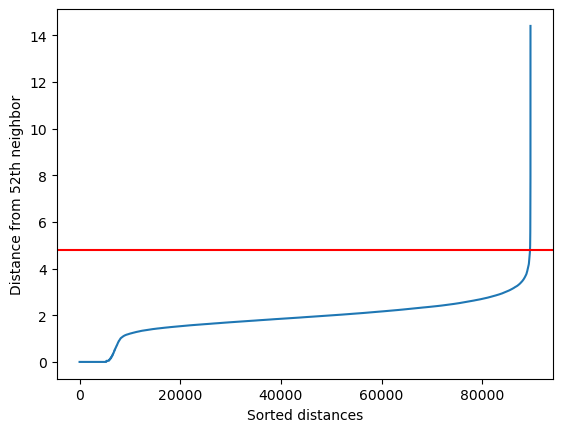

In [54]:
neighbors = NearestNeighbors(n_neighbors=min_pts)
neighbors_fit = neighbors.fit(df_transformed_db)
distances, indices = neighbors_fit.kneighbors(df_transformed_db)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
kneedle = KneeLocator(range(distances.shape[0]), distances, S=1.0, curve="convex", direction="increasing")
plt.plot(range(distances.shape[0]), distances)
eps = kneedle.knee_y
plt.axhline(y=eps, color='r', linestyle='-', label="eps")
plt.xlabel('Sorted distances')
plt.ylabel('Distance from 52th neighbor')
plt.show()

In [55]:
dbscan = DBSCAN(eps=eps, min_samples=52)
dbscan.fit(df_transformed_db)

DBSCAN(eps=4.7887007967157205, min_samples=52)

In [56]:
labels, counts = np.unique(dbscan.labels_, return_counts=True)
print(labels, counts)

[-1  0  1] [  464 88948   148]


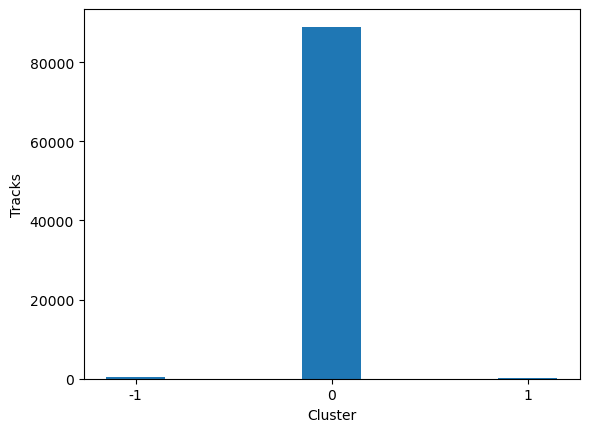

In [57]:
plt.bar(range(len(labels)), counts, width=0.3)
plt.xticks(range(len(labels)), labels)
plt.xlabel('Cluster')
plt.ylabel('Tracks')
plt.show()

In [58]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([  464, 88948,   148], dtype=int64))

In [59]:
b_db['cluster'] = dbscan.labels_
b_db

,explicit,popularity,album_type,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre,popularity_art,followers,cluster
0,-0.308372,0.954321,-0.808554,-0.170194,-0.457618,-1.484208,-0.257422,0.755049,3.577203,0.647071,...,-1.405285,0.569236,0.042580,0.082323,1.064146,1.891457,0.505055,0.154400,-0.276662,0
1,-0.308372,0.629121,-0.808554,1.063184,-1.147145,-0.079724,-0.814948,-1.324418,-0.484243,-0.475988,...,0.773458,-2.508896,-0.319820,0.432448,2.655616,2.459406,0.505055,-0.069894,-0.274944,0
2,-0.308372,0.350377,-0.808554,1.351727,0.017648,0.482069,-0.417234,-1.324418,0.145617,-0.883835,...,1.333044,-1.910624,1.669354,1.367938,0.249002,0.869150,0.505055,-0.238115,-0.292504,0
3,-0.308372,-1.461455,1.527045,0.638857,-0.356332,0.201172,-0.666427,-1.324418,-0.208128,-0.826500,...,1.448935,-1.723378,0.090900,-0.038032,1.586010,1.453326,0.505055,-0.574556,-0.286129,0
4,-0.308372,-1.461455,0.359246,1.125419,0.142309,1.605656,-0.927295,-1.324418,-0.403084,0.546587,...,1.448935,0.569236,-0.062113,-0.278743,0.149805,0.090249,0.505055,-0.182041,-0.273034,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89555,3.242840,-0.392939,1.527045,-0.543603,1.353849,-0.079724,1.115245,-1.324418,-0.108444,-0.944687,...,0.942327,0.569236,-1.616407,-1.794128,0.546594,0.447245,-0.790162,1.313255,1.255038,0
89556,3.242840,1.140150,1.527045,0.587937,0.333194,1.043863,0.769016,0.755049,-0.534526,0.126918,...,0.886038,0.569236,-0.380220,0.137030,-0.514386,-0.542608,-0.790162,-0.069894,-0.299841,0
89557,3.242840,2.255124,-0.808554,1.419619,-0.029099,1.605656,0.666621,-1.324418,-0.343098,-0.741680,...,1.223776,0.523566,-1.580167,-0.984464,-0.177977,-0.185612,-0.790162,1.920718,1.731344,0
89558,-0.308372,1.325979,1.527045,0.514387,0.563036,-1.484208,1.027396,0.755049,-0.426020,0.129873,...,0.680746,0.569236,0.223780,0.514509,-0.428127,-0.461473,-0.790162,-0.322225,-0.300865,0


In [60]:
b_db['outlier_db'] = dbscan.labels_ 
b_db['outlier_db'] = b_db['outlier_db'].apply(lambda x: 'inlier' if x in [0,1, 2, 3]  else 'outlier')

In [61]:
df_final['outlier_dbscan'] = dbscan.labels_ 
df_final['outlier_dbscan'] = df_final['outlier_dbscan'].apply(lambda x: 'inlier' if x in [0, 1, 2, 3] else 'outlier')

In [62]:
df_final

,explicit,popularity,album_type,danceability,energy,key,loudness,mode,speechiness,acousticness,...,key_confidence,mode_confidence,n_beats,n_bars,genre,popularity_art,followers,outlier_if,outlier_lof,outlier_dbscan
0,0,52,0,0.532,0.517,0,-9.846,1,0.4930,0.54700,...,0.500,0.525,705.0,234.0,73,51.000000,2.188180e+05,inlier,inlier,inlier
1,0,45,0,0.750,0.340,5,-12.759,0,0.0326,0.16700,...,0.410,0.589,1074.0,269.0,73,47.000000,2.316130e+05,inlier,inlier,inlier
2,0,39,0,0.801,0.639,7,-10.681,0,0.1040,0.02900,...,0.904,0.760,516.0,171.0,73,44.000000,1.008280e+05,inlier,inlier,inlier
3,0,0,2,0.675,0.543,6,-11.983,0,0.0639,0.04840,...,0.512,0.503,826.0,207.0,73,38.000000,1.483065e+05,inlier,inlier,inlier
4,0,0,1,0.761,0.671,11,-13.346,0,0.0418,0.51300,...,0.474,0.459,493.0,123.0,73,45.000000,2.458390e+05,inlier,inlier,inlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89555,1,23,2,0.466,0.982,5,-2.674,0,0.0752,0.00841,...,0.088,0.182,585.0,145.0,30,71.666667,1.162675e+07,inlier,inlier,inlier
89556,1,56,2,0.666,0.720,9,-4.483,1,0.0269,0.37100,...,0.395,0.535,339.0,84.0,30,47.000000,4.618400e+04,inlier,inlier,inlier
89557,1,80,0,0.813,0.627,11,-5.018,0,0.0486,0.07710,...,0.097,0.330,417.0,106.0,30,82.500000,1.517423e+07,inlier,inlier,inlier
89558,0,60,2,0.653,0.779,0,-3.133,1,0.0392,0.37200,...,0.545,0.604,359.0,89.0,30,42.500000,3.855350e+04,inlier,inlier,inlier


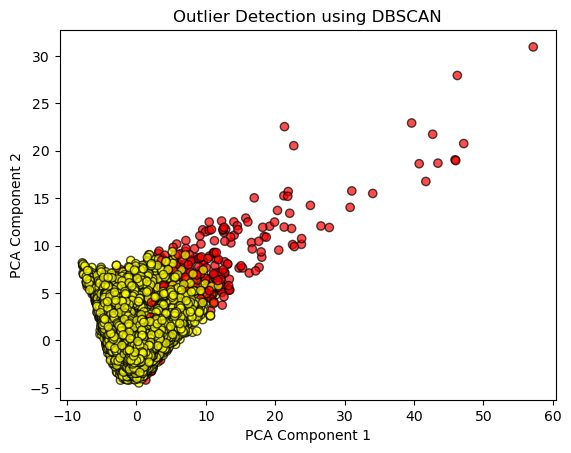

In [ ]:
numeric_data_db = df_transformed_db  #  this is a numeric DataFrame/array without the 'outlier_KNN' column
pca = PCA(n_components=2)
df_2d_db = pca.fit_transform(numeric_data_db)
color_map = {'inlier': 'yellow', 'outlier': 'red'}
colors = b_db['outlier_db'].map(color_map)

# plot on a scatter plot
plt.scatter(df_2d_db[:, 0], df_2d_db[:, 1], c=colors, edgecolor='k', alpha=0.7)
plt.title('Outlier Detection using DBSCAN')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

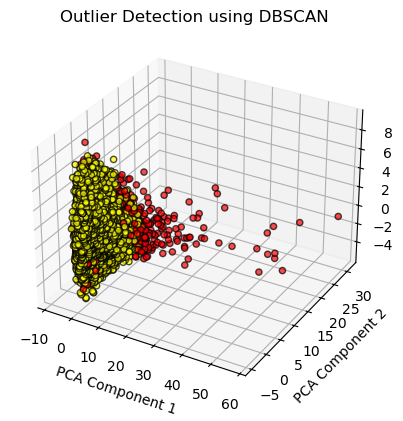

In [ ]:
# the numeric data is used for PCA
numeric_data_db = df_transformed_db  

# apply PCA to reduce the dimensions to 3
pca = PCA(n_components=3)
df_3d_db= pca.fit_transform(numeric_data_db)

# create a color map for 'inlier' and 'outlier'
color_map = {'inlier': 'yellow', 'outlier': 'red'}
colors = b_db['outlier_db'].map(color_map)

# create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df_3d_db[:, 0], df_3d_db[:, 1], df_3d_db[:, 2], c=colors, edgecolor='k', alpha=0.7)

ax.set_title('Outlier Detection using DBSCAN')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.show()

## Clustering Based Local Outlier Factor (CBLOF)

In [65]:
from pyod.models.cblof import CBLOF

In [66]:
df_new_cblof = df_new.copy()

In [67]:
X_cblof = df_new_cblof.values
X_cblof.shape 

(89560, 26)

In [68]:
scaler = StandardScaler()
df_transformed_cblof = scaler.fit_transform(X_cblof)
b_cblof = pd.DataFrame(X_cblof, columns= df_new_cblof.columns)

In [69]:
clf_cblof = CBLOF(contamination = 0.01)
clf_cblof.fit(df_transformed_cblof)

E:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.01, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False)

In [70]:
clf_cblof.decision_scores_

array([5.77038533, 4.1523212 , 5.08597592, ..., 4.91550505, 3.4034512 ,
       3.31818695])

In [71]:
outliers = clf_cblof.predict(df_transformed_cblof)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([88664,   896], dtype=int64))

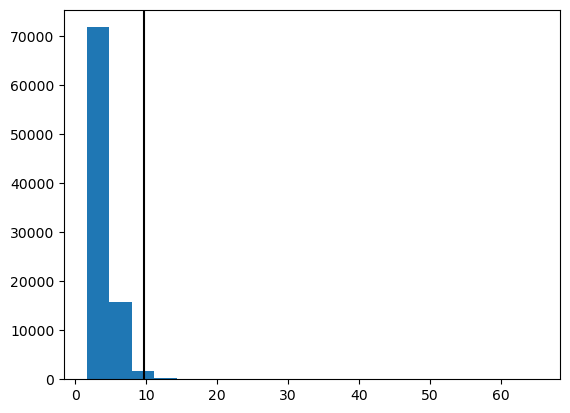

In [72]:
plt.hist(clf_cblof.decision_scores_, bins=20)
plt.axvline(np.min(clf_cblof.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

In [73]:
b_cblof['outlier_cblof'] = outliers 
b_cblof['outlier_cblof'] = b_cblof['outlier_cblof'].apply(lambda x: 'inlier' if x==0 else 'outlier')

In [74]:
df_final['outlier_cblof'] = outliers 
df_final['outlier_cblof'] = df_final['outlier_cblof'].apply(lambda x: 'inlier' if x==0 else 'outlier')

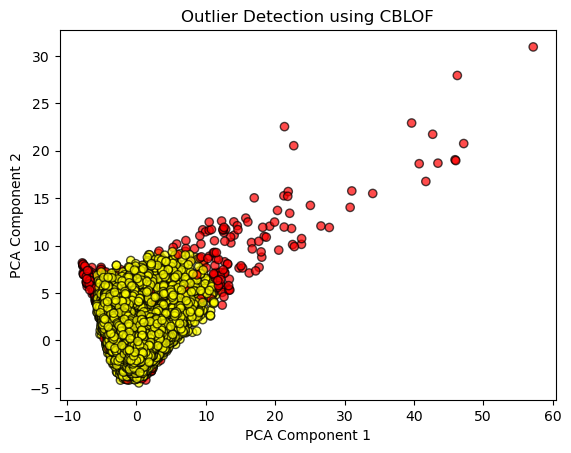

In [ ]:
numeric_data = df_transformed_cblof  
pca = PCA(n_components=2)
df_2d_cblof = pca.fit_transform(numeric_data)
color_map = {'inlier': 'yellow', 'outlier': 'red'}
colors = b_cblof['outlier_cblof'].map(color_map)

# plot on a scatter plot
plt.scatter(df_2d_cblof[:, 0], df_2d_cblof[:, 1], c=colors, edgecolor='k', alpha=0.7)
plt.title('Outlier Detection using CBLOF')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

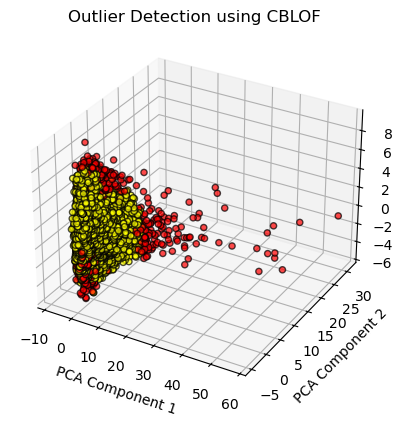

In [ ]:
numeric_data_cblof = df_transformed_cblof  

# apply PCA to reduce the dimensions to 3
pca = PCA(n_components=3)
df_3d_cblof= pca.fit_transform(numeric_data_cblof)

color_map = {'inlier': 'yellow', 'outlier': 'red'}
colors = b_cblof['outlier_cblof'].map(color_map)

# create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df_3d_cblof[:, 0], df_3d_cblof[:, 1], df_3d_lof[:, 2], c=colors, edgecolor='k', alpha=0.7)

ax.set_title('Outlier Detection using CBLOF')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.show()

# Distance-based Approaches

## KNN

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [78]:
pip install pyod

Note: you may need to restart the kernel to use updated packages.


In [79]:
df_new_knn = df_new.copy()

In [80]:
df_new_knn

,explicit,popularity,album_type,danceability,energy,key,loudness,mode,speechiness,acousticness,...,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre,popularity_art,followers
0,0,52,0,0.532,0.517,0,-9.846,1,0.4930,0.54700,...,275.90530,0.020,1.000,0.500,0.525,705.0,234.0,73,51.000000,2.188180e+05
1,0,45,0,0.750,0.340,5,-12.759,0,0.0326,0.16700,...,517.28253,0.678,0.326,0.410,0.589,1074.0,269.0,73,47.000000,2.316130e+05
2,0,39,0,0.801,0.639,7,-10.681,0,0.1040,0.02900,...,259.04180,0.847,0.457,0.904,0.760,516.0,171.0,73,44.000000,1.008280e+05
3,0,0,2,0.675,0.543,6,-11.983,0,0.0639,0.04840,...,387.41360,0.882,0.498,0.512,0.503,826.0,207.0,73,38.000000,1.483065e+05
4,0,0,1,0.761,0.671,11,-13.346,0,0.0418,0.51300,...,239.63574,0.882,1.000,0.474,0.459,493.0,123.0,73,45.000000,2.458390e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89555,1,23,2,0.466,0.982,5,-2.674,0,0.0752,0.00841,...,200.10376,0.729,1.000,0.088,0.182,585.0,145.0,30,71.666667,1.162675e+07
89556,1,56,2,0.666,0.720,9,-4.483,1,0.0269,0.37100,...,200.98611,0.712,1.000,0.395,0.535,339.0,84.0,30,47.000000,4.618400e+04
89557,1,80,0,0.813,0.627,11,-5.018,0,0.0486,0.07710,...,189.48643,0.814,0.990,0.097,0.330,417.0,106.0,30,82.500000,1.517423e+07
89558,0,60,2,0.653,0.779,0,-3.133,1,0.0392,0.37200,...,197.41605,0.650,1.000,0.545,0.604,359.0,89.0,30,42.500000,3.855350e+04


In [81]:
X_knn = df_new_knn.values
X_knn.shape 

(89560, 26)

In [82]:
y = df['genre']

In [83]:
scaler = StandardScaler()
df_transformed_knn = scaler.fit_transform(X_knn)
b_knn = pd.DataFrame(df_transformed_knn, columns= df_new.columns)

In [ ]:
# define a range of values for k
param_grid = {'n_neighbors': range(5, 30) ,'weights': ['uniform','distance'],
              'metric':['euclidean']}
knn_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)

In [ ]:
# fit the model to the training data
a = grid_search.fit(df_transformed_knn,y)

In [86]:
best_k_value = grid_search.best_params_['n_neighbors']
print(f'Best number of neighbors: {best_k_value}')

Best number of neighbors: 17


In [228]:
from pyod.models.knn import KNN
clf_knn = KNN(n_neighbors=17, contamination=0.01, metric='euclidean')
clf_knn.fit(df_transformed_knn)

KNN(algorithm='auto', contamination=0.01, leaf_size=30, method='largest',
  metric='euclidean', metric_params=None, n_jobs=1, n_neighbors=17, p=2,
  radius=1.0)

In [229]:
clf_knn.decision_scores_

array([4.62754618, 3.85193597, 3.83018847, ..., 3.32777239, 1.99090219,
       2.28165554])

In [230]:
outliers = clf_knn.predict(df_transformed_knn)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([88709,   851], dtype=int64))

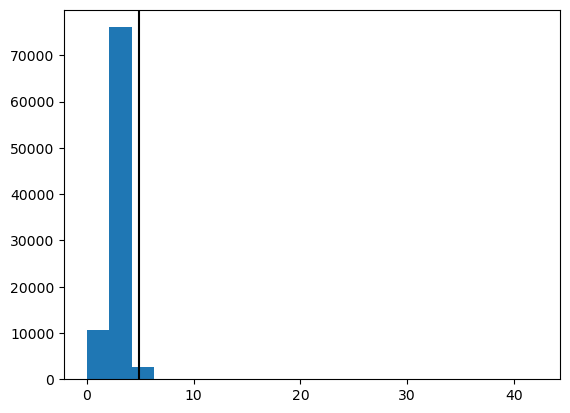

In [231]:
plt.hist(clf_knn.decision_scores_, bins=20)
plt.axvline(np.min(clf_knn.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

In [232]:
b_knn['outlier_KNN'] = outliers 
b_knn['outlier_KNN'] = b_knn['outlier_KNN'].apply(lambda x: 'inlier' if x==0 else 'outlier')

In [233]:
df_final['outlier_KNN'] = outliers 
df_final['outlier_KNN'] = df_final['outlier_KNN'].apply(lambda x: 'inlier' if x==0 else 'outlier')

In [234]:
df_final

,explicit,popularity,album_type,danceability,energy,key,loudness,mode,speechiness,acousticness,...,outlier_dbscan,outlier_cblof,outlier_KNN,outlier_hbos,outlier_fb,outlier_loda,outlier_ee,Winner,pca_one,pca_two
0,0,52,0,0.532,0.517,0,-9.846,1,0.4930,0.54700,...,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,1.484568,2.104500
1,0,45,0,0.750,0.340,5,-12.759,0,0.0326,0.16700,...,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,4.402654,3.707754
2,0,39,0,0.801,0.639,7,-10.681,0,0.1040,0.02900,...,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,0.719339,1.063497
3,0,0,2,0.675,0.543,6,-11.983,0,0.0639,0.04840,...,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,2.817027,2.272988
4,0,0,1,0.761,0.671,11,-13.346,0,0.0418,0.51300,...,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,0.401563,0.763740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89555,1,23,2,0.466,0.982,5,-2.674,0,0.0752,0.00841,...,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,1.780172,-2.298541
89556,1,56,2,0.666,0.720,9,-4.483,1,0.0269,0.37100,...,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,-0.437783,-1.629090
89557,1,80,0,0.813,0.627,11,-5.018,0,0.0486,0.07710,...,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,0.458194,-3.373682
89558,0,60,2,0.653,0.779,0,-3.133,1,0.0392,0.37200,...,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,-0.279505,-1.241604


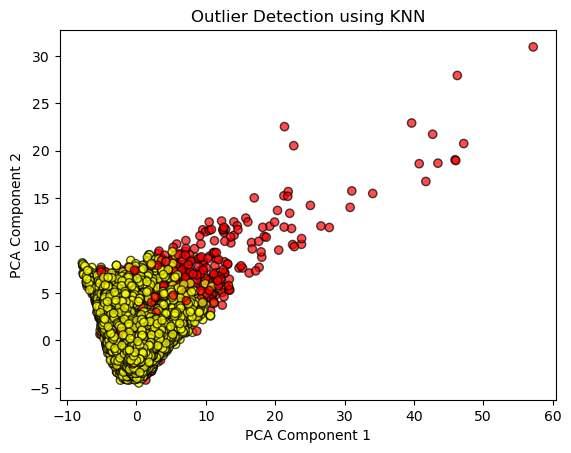

In [ ]:
numeric_data = df_transformed_knn  # this is a numeric DataFrame/array without the 'outlier_KNN' column
pca = PCA(n_components=2)
df_2d_knn = pca.fit_transform(numeric_data)
color_map = {'inlier': 'yellow', 'outlier': 'red'}
colors = b_knn['outlier_KNN'].map(color_map)

# plot on a scatter plot
plt.scatter(df_2d_knn[:, 0], df_2d_knn[:, 1], c=colors, edgecolor='k', alpha=0.7)
plt.title('Outlier Detection using KNN')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

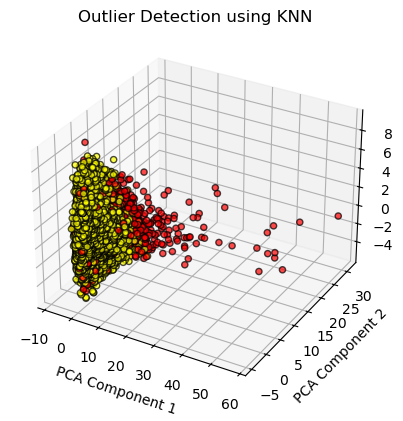

In [ ]:
numeric_data_knn = df_transformed_knn  

# apply PCA to reduce the dimensions to 3
pca = PCA(n_components=3)
df_3d_knn = pca.fit_transform(numeric_data_knn )

color_map = {'inlier': 'yellow', 'outlier': 'red'}
colors = b_knn ['outlier_KNN'].map(color_map)

# create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df_3d_knn [:, 0], df_3d_knn [:, 1], df_3d_knn [:, 2], c=colors, edgecolor='k', alpha=0.7)

ax.set_title('Outlier Detection using KNN')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.show()

## Histogram-based Outlier Score (HBOS)

In [96]:
from pyod.models.hbos import HBOS

In [97]:
df_new_hbos = df_new.copy()

In [98]:
X_hbos = df_new_hbos.values
X_hbos.shape 

(89560, 26)

In [99]:
scaler = StandardScaler()
df_transformed_hbos = scaler.fit_transform(X_hbos)
b_hbos = pd.DataFrame(X_hbos, columns= df_new_hbos.columns)

In [100]:
clf_hbos = HBOS(contamination = 0.01)
clf_hbos.fit(df_transformed_hbos)

HBOS(alpha=0.1, contamination=0.01, n_bins=10, tol=0.5)

In [101]:
clf_hbos.decision_scores_

array([29.26750184, 33.8454123 , 30.2777496 , ..., 26.20342021,
       18.4662262 , 18.18771881])

In [102]:
outliers = clf_hbos.predict(df_transformed_hbos)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([88664,   896], dtype=int64))

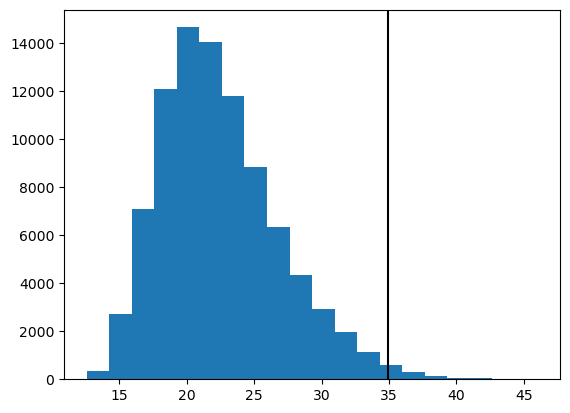

In [103]:
plt.hist(clf_hbos.decision_scores_, bins=20)
plt.axvline(np.min(clf_hbos.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

In [104]:
b_hbos['outlier_hbos'] = outliers 
b_hbos['outlier_hbos'] = b_hbos['outlier_hbos'].apply(lambda x: 'inlier' if x==0 else 'outlier')

In [105]:
df_final['outlier_hbos'] = outliers 
df_final['outlier_hbos'] = df_final['outlier_hbos'].apply(lambda x: 'inlier' if x==0 else 'outlier')

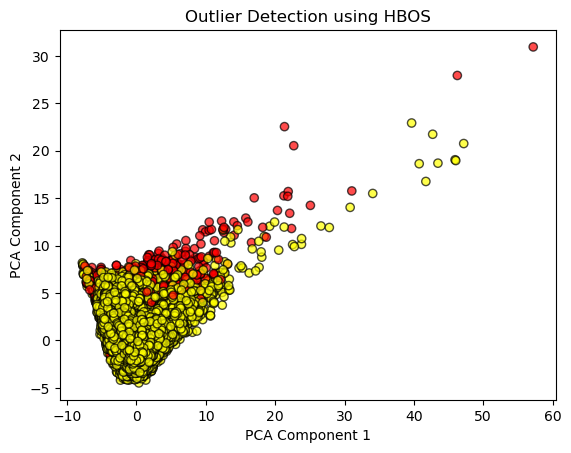

In [ ]:
numeric_data_hbos = df_transformed_hbos  
pca = PCA(n_components=2)
df_2d_hbos = pca.fit_transform(numeric_data_hbos)
color_map = {'inlier': 'yellow', 'outlier': 'red'}
colors = b_hbos['outlier_hbos'].map(color_map)

# plot on a scatter plot
plt.scatter(df_2d_hbos[:, 0], df_2d_hbos[:, 1], c=colors, edgecolor='k', alpha=0.7)
plt.title('Outlier Detection using HBOS')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

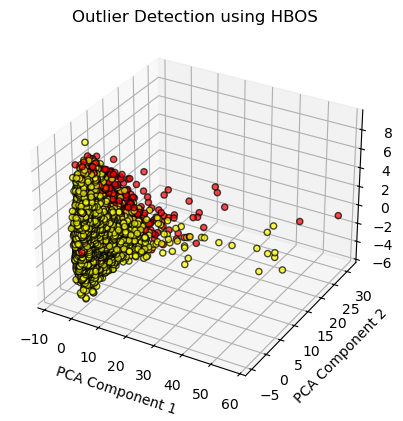

In [ ]:
numeric_data_hbos = df_transformed_hbos  

# apply PCA to reduce the dimensions to 3
pca = PCA(n_components=3)
df_3d_hbos = pca.fit_transform(numeric_data_hbos )

color_map = {'inlier': 'yellow', 'outlier': 'red'}
colors = b_hbos ['outlier_hbos'].map(color_map)

# create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df_3d_hbos [:, 0], df_3d_hbos [:, 1], df_3d_hbos [:, 2], c=colors, edgecolor='k', alpha=0.7)

ax.set_title('Outlier Detection using HBOS')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.show()

# High-dimensional Approaches

## ABOD

In [108]:
from pyod.models.abod import ABOD

In [109]:
df_new_abod = df_new.copy()

In [110]:
X_abod = df_new_abod.values
X_abod.shape 

(89560, 26)

In [111]:
scaler = StandardScaler()
df_transformed_abod = scaler.fit_transform(X_abod)
b_abod = pd.DataFrame(X_abod, columns= df_new_abod.columns)

In [112]:
clf_abod = ABOD(n_neighbors=25, contamination=0.01)
clf_abod.fit(X_abod)

E:\Anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
E:\Anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
E:\Anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ABOD(contamination=0.01, method='fast', n_neighbors=25)

In [113]:
clf_abod.decision_scores_

array([-8.34496941e-15, -1.21181362e-18, -2.91984773e-13, ...,
       -3.36804991e-20, -4.01842343e-13, -4.53341316e-15])

In [114]:
outliers = clf_abod.predict(df_transformed_abod)
np.unique(outliers, return_counts=True)

(array([0]), array([89560], dtype=int64))

ValueError: zero-size array to reduction operation minimum which has no identity

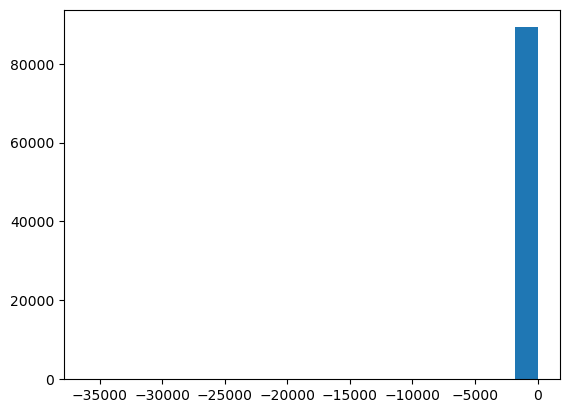

In [115]:
plt.hist(clf_abod.decision_scores_, bins=20)
plt.axvline(np.min(clf_abod.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

# Ensemble-based Appraoches

## Feature Bagging

In [116]:
!pip install combo

In [117]:
from pyod.models.feature_bagging import FeatureBagging

In [118]:
df_new_fb = df_new.copy()

In [119]:
X_fb = df_new_fb.values
X_fb.shape 

(89560, 26)

In [120]:
scaler = StandardScaler()
df_transformed_fb = scaler.fit_transform(X_fb)
b_fb = pd.DataFrame(X_fb, columns= df_new_fb.columns)

In [121]:
clf_fb = FeatureBagging(contamination=0.01, random_state=0)

In [122]:
clf_fb.fit(df_transformed_fb)

FeatureBagging(base_estimator=None, bootstrap_features=False,
        check_detector=True, check_estimator=False, combination='average',
        contamination=0.01, estimator_params={}, max_features=1.0,
        n_estimators=10, n_jobs=1, random_state=0, verbose=0)

In [123]:
outliers = clf_fb.predict(df_transformed_fb)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([88733,   827], dtype=int64))

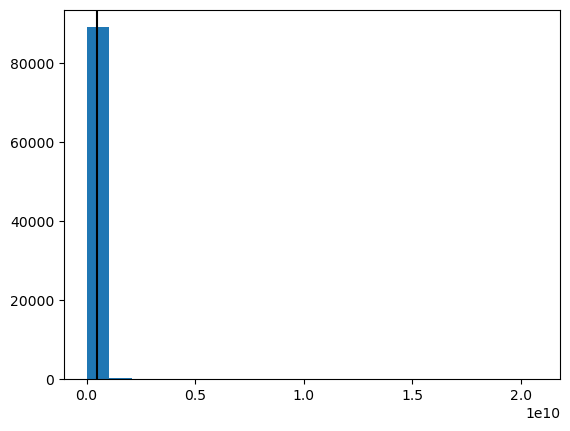

In [124]:
plt.hist(clf_fb.decision_scores_, bins=20)
plt.axvline(np.min(clf_fb.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

In [125]:
b_fb['outlier_fb'] = outliers 
b_fb['outlier_fb'] = b_fb['outlier_fb'].apply(lambda x: 'inlier' if x==0 else 'outlier')

In [126]:
df_final['outlier_fb'] = outliers 
df_final['outlier_fb'] = df_final['outlier_fb'].apply(lambda x: 'inlier' if x==0 else 'outlier')

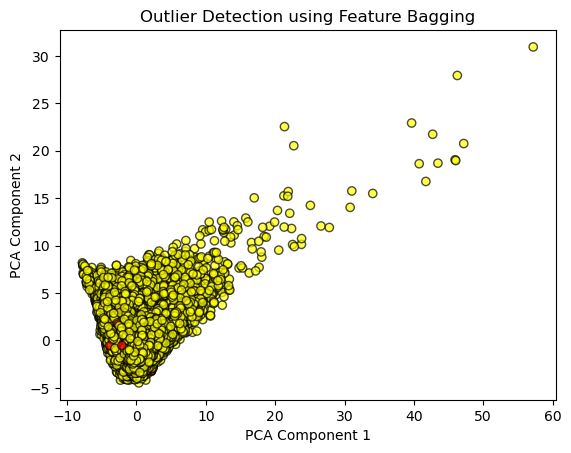

In [ ]:
numeric_data_fb = df_transformed_fb  
pca = PCA(n_components=2)
df_2d_fb = pca.fit_transform(numeric_data_fb)
color_map = {'inlier': 'yellow', 'outlier': 'red'}
colors = b_fb['outlier_fb'].map(color_map)

# plot  on a scatter plot
plt.scatter(df_2d_fb[:, 0], df_2d_fb[:, 1], c=colors, edgecolor='k', alpha=0.7)
plt.title('Outlier Detection using Feature Bagging')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

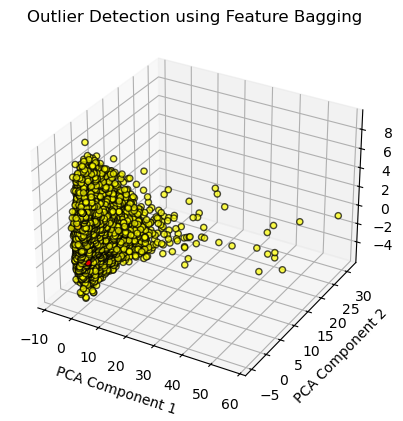

In [ ]:
numeric_data_fb = df_transformed_fb  

# apply PCA to reduce the dimensions to 3
pca = PCA(n_components=3)
df_3d_fb = pca.fit_transform(numeric_data_fb )

color_map = {'inlier': 'yellow', 'outlier': 'red'}
colors = b_fb ['outlier_fb'].map(color_map)

# create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df_3d_fb [:, 0], df_3d_fb [:, 1], df_3d_fb [:, 2], c=colors, edgecolor='k', alpha=0.7)

ax.set_title('Outlier Detection using Feature Bagging')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.show()

## LODA

In [129]:
from pyod.models.loda import LODA

In [130]:
df_new_loda = df_new.copy()

In [131]:
X_loda = df_new_loda.values
X_loda.shape 

(89560, 26)

In [132]:
scaler = StandardScaler()
df_transformed_loda = scaler.fit_transform(X_loda)
b_loda = pd.DataFrame(X_loda, columns= df_new_loda.columns)

In [133]:
clf_loda = LODA(contamination=0.01)
clf_loda.fit(df_transformed_loda)

LODA(contamination=0.01, n_bins=10, n_random_cuts=100)

In [134]:
outliers = clf_loda.predict(df_transformed_loda)
np.unique(outliers, return_counts=True)

(array([0, 1]), array([88664,   896], dtype=int64))

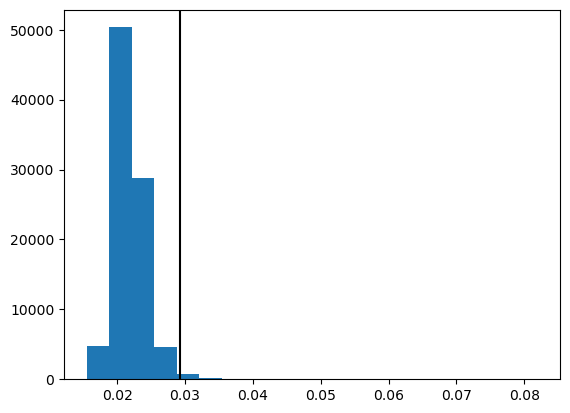

In [135]:
plt.hist(clf_loda.decision_scores_, bins=20)
plt.axvline(np.min(clf_loda.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

In [136]:
b_loda['outlier_loda'] = outliers 
b_loda['outlier_loda'] = b_loda['outlier_loda'].apply(lambda x: 'inlier' if x==0 else 'outlier')

In [137]:
df_final['outlier_loda'] = outliers 
df_final['outlier_loda'] = df_final['outlier_loda'].apply(lambda x: 'inlier' if x==0 else 'outlier')

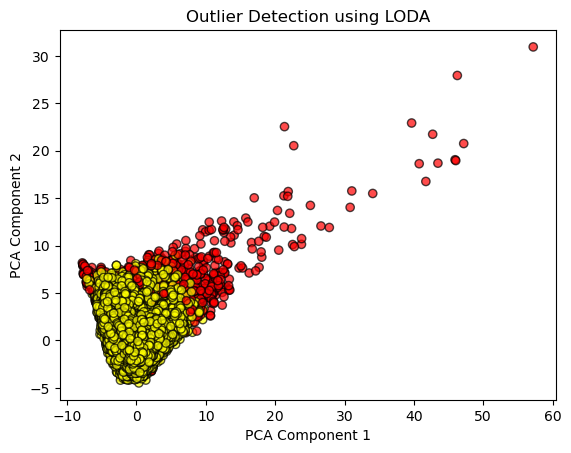

In [ ]:
numeric_data_loda = df_transformed_loda
pca = PCA(n_components=2)
df_2d_loda = pca.fit_transform(numeric_data_loda)
color_map = {'inlier': 'yellow', 'outlier': 'red'}
colors = b_loda['outlier_loda'].map(color_map)

# plot on a scatter plot
plt.scatter(df_2d_loda[:, 0], df_2d_loda[:, 1], c=colors, edgecolor='k', alpha=0.7)
plt.title('Outlier Detection using LODA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

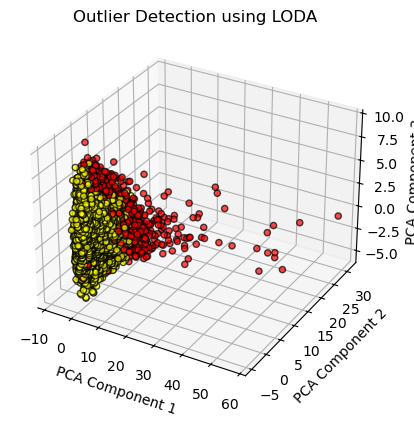

In [ ]:
numeric_data_loda = df_transformed_loda  

# apply PCA to reduce the dimensions to 3
pca = PCA(n_components=3)
df_3d_loda = pca.fit_transform(numeric_data_loda )

color_map = {'inlier': 'yellow', 'outlier': 'red'}
colors = b_loda ['outlier_loda'].map(color_map)

# create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df_3d_loda [:, 0], df_3d_loda [:, 1], df_3d_loda [:, 2], c=colors, edgecolor='k', alpha=0.7)

ax.set_title('Outlier Detection using LODA')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.show()

# Depth-based Approaches

## EllEnv

In [167]:
from sklearn.covariance import EllipticEnvelope

In [168]:
df_new_ee = df_new.copy()

In [169]:
X_ee = df_new_ee.values
X_ee.shape 

(89560, 26)

In [170]:
scaler = StandardScaler()
df_transformed_ee = scaler.fit_transform(X_ee)
b_ee = pd.DataFrame(X_ee, columns= df_new_ee.columns)

In [171]:
clf_ee = EllipticEnvelope(random_state=0, contamination=0.01)
clf_ee.fit(df_transformed_ee)

E:\Anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-45.791634707560227 > -107.654922434978829). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
E:\Anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-45.547305752411205 > -108.105236252798562). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
E:\Anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:184: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-44.293552074915539 > -107.722653403430769). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
E:\Anaconda3\Lib\site-packages\sklearn\c

EllipticEnvelope(contamination=0.01, random_state=0)

In [172]:
outliers = clf_ee.predict(df_transformed_ee)
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  896, 88664], dtype=int64))

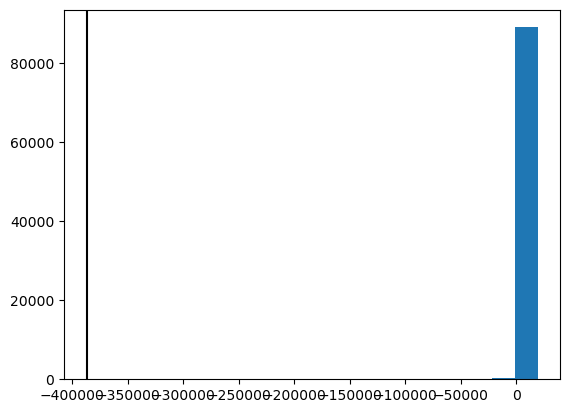

In [175]:
plt.hist(clf_ee.decision_function(df_transformed_ee), bins=20)  # Use decision_function instead
plt.axvline(np.min(clf_ee.decision_function(df_transformed_ee[outliers == -1])), c='k')  # Filter outliers
plt.show()

In [176]:
b_ee['outlier_ee'] = outliers 
b_ee['outlier_ee'] = b_ee['outlier_ee'].apply(lambda x: 'inlier' if x==1 else 'outlier')

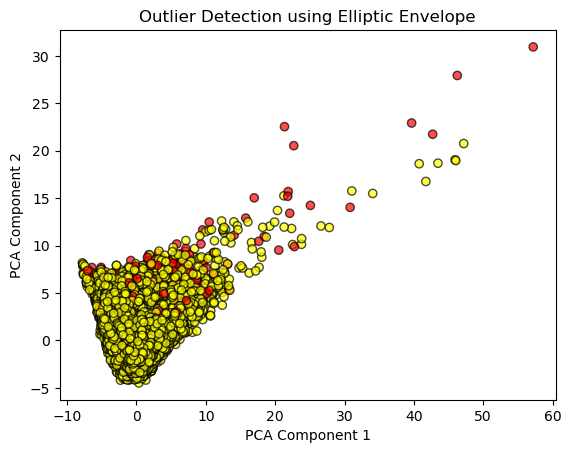

In [ ]:
numeric_data_ee = df_transformed_ee
pca = PCA(n_components=2)
df_2d_ee = pca.fit_transform(numeric_data_ee)
color_map = {'inlier': 'yellow', 'outlier': 'red'}
colors = b_ee['outlier_ee'].map(color_map)

# plot on a scatter plot
plt.scatter(df_2d_ee[:, 0], df_2d_ee[:, 1], c=colors, edgecolor='k', alpha=0.7)
plt.title('Outlier Detection using Elliptic Envelope')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

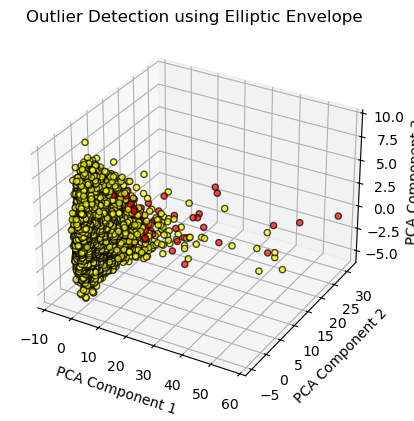

In [ ]:
numeric_data_ee = df_transformed_ee  

# apply PCA to reduce the dimensions to 3
pca = PCA(n_components=3)
df_3d_ee = pca.fit_transform(numeric_data_ee )

color_map = {'inlier': 'yellow', 'outlier': 'red'}
colors = b_ee ['outlier_ee'].map(color_map)

# create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df_3d_loda [:, 0], df_3d_loda [:, 1], df_3d_loda [:, 2], c=colors, edgecolor='k', alpha=0.7)

ax.set_title('Outlier Detection using Elliptic Envelope')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

plt.show()

In [180]:
df_final['outlier_ee'] = outliers 
df_final['outlier_ee'] = df_final['outlier_ee'].apply(lambda x: 'inlier' if x==1 else 'outlier')

## Removing Outliers

Algorithms employed:
1. Isolation Forest
2. LOF
3. DBSCAN
4. CBLOF
5. KNN
6. HBOS
7. Elliptic Envelope
8. LODA \
Based on the scores provided by each outlier detection method, we will take a majority voting in order to determine if a point x is an outlier or an inlier.

In [253]:
df_final.drop(columns=['Winner'], inplace=True)
df_final.drop(columns=['pca_one'], inplace=True)
df_final.drop(columns=['pca_two'], inplace=True)

In [254]:
df_final

,explicit,popularity,album_type,danceability,energy,key,loudness,mode,speechiness,acousticness,...,popularity_art,followers,outlier_if,outlier_lof,outlier_dbscan,outlier_cblof,outlier_KNN,outlier_hbos,outlier_loda,outlier_ee
0,0,52,0,0.532,0.517,0,-9.846,1,0.4930,0.54700,...,51.000000,2.188180e+05,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
1,0,45,0,0.750,0.340,5,-12.759,0,0.0326,0.16700,...,47.000000,2.316130e+05,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
2,0,39,0,0.801,0.639,7,-10.681,0,0.1040,0.02900,...,44.000000,1.008280e+05,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
3,0,0,2,0.675,0.543,6,-11.983,0,0.0639,0.04840,...,38.000000,1.483065e+05,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
4,0,0,1,0.761,0.671,11,-13.346,0,0.0418,0.51300,...,45.000000,2.458390e+05,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89555,1,23,2,0.466,0.982,5,-2.674,0,0.0752,0.00841,...,71.666667,1.162675e+07,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
89556,1,56,2,0.666,0.720,9,-4.483,1,0.0269,0.37100,...,47.000000,4.618400e+04,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
89557,1,80,0,0.813,0.627,11,-5.018,0,0.0486,0.07710,...,82.500000,1.517423e+07,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
89558,0,60,2,0.653,0.779,0,-3.133,1,0.0392,0.37200,...,42.500000,3.855350e+04,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier


In [255]:
# majority voting
mostCommonVote=[]
for row in df_final[['outlier_if', 'outlier_lof', 'outlier_dbscan','outlier_cblof',
       'outlier_KNN','outlier_hbos','outlier_loda','outlier_ee']].values:
    votes, values = np.unique(row, return_counts=True)
    if np.all(values<=1):
            mostCommonVote.append( row[0] )
    else:
        mostCommonVote.append( votes[np.argmax(values)] )

df_final['Winner'] = mostCommonVote

In [256]:
df_final[['Winner']].value_counts()

Winner 
inlier     89345
outlier      215
Name: count, dtype: int64

In [257]:
df_final[df_final['Winner']=='outlier']

,explicit,popularity,album_type,danceability,energy,key,loudness,mode,speechiness,acousticness,...,followers,outlier_if,outlier_lof,outlier_dbscan,outlier_cblof,outlier_KNN,outlier_hbos,outlier_loda,outlier_ee,Winner
663,1,79,0,0.708,0.843,7,-2.660,1,0.3140,0.3970,...,74931735.00,inlier,inlier,outlier,outlier,outlier,outlier,outlier,inlier,outlier
3224,0,9,0,0.364,0.470,0,-17.925,1,0.0342,0.9420,...,11630.00,outlier,inlier,outlier,inlier,outlier,inlier,outlier,outlier,outlier
3336,0,17,0,0.512,0.541,9,-16.636,1,0.0374,0.9090,...,11630.00,outlier,inlier,outlier,inlier,outlier,outlier,outlier,inlier,outlier
3765,0,12,2,0.199,0.289,9,-17.806,0,0.0384,0.7320,...,451115.00,outlier,outlier,outlier,outlier,outlier,outlier,outlier,inlier,outlier
4357,0,52,0,0.400,0.694,3,-8.486,1,0.0621,0.5730,...,5041521.00,inlier,inlier,outlier,outlier,outlier,inlier,outlier,outlier,outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80163,0,10,1,0.598,0.940,10,-2.479,0,0.0562,0.0011,...,32483.00,inlier,outlier,outlier,outlier,outlier,inlier,outlier,inlier,outlier
80250,0,0,0,0.442,0.193,7,-18.109,1,0.0573,0.9820,...,3875.50,outlier,inlier,outlier,outlier,outlier,inlier,outlier,inlier,outlier
80251,0,0,0,0.418,0.296,5,-17.154,1,0.2040,0.9770,...,3676.25,outlier,inlier,outlier,outlier,outlier,outlier,outlier,inlier,outlier
80433,0,0,0,0.302,0.632,9,-13.689,1,0.0647,0.0130,...,73716.00,outlier,inlier,outlier,outlier,outlier,inlier,outlier,inlier,outlier


In [258]:
df_final.describe()

,explicit,popularity,album_type,danceability,energy,key,loudness,mode,speechiness,acousticness,...,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre,popularity_art,followers
count,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,...,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,89560.000000,8.956000e+04
mean,0.086836,31.458073,0.692374,0.562082,0.634470,5.283821,-8.501006,0.636903,0.087493,0.328056,...,220.720225,0.444409,0.875358,0.489425,0.509952,458.266012,117.438399,56.232637,48.246467,2.279366e+06
std,0.281596,21.525287,0.856316,0.176751,0.256699,3.560046,5.224897,0.480895,0.113359,0.338364,...,100.278723,0.302011,0.218965,0.248346,0.182793,231.862406,61.625630,33.199249,17.833809,7.447931e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,...,8.586670,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,15.000000,0.000000,0.450000,0.457000,2.000000,-10.327000,0.000000,0.036000,0.017100,...,166.157222,0.167000,0.855000,0.322000,0.397000,312.000000,79.000000,27.000000,36.500000,2.995400e+04
50%,0.000000,31.000000,0.000000,0.576000,0.677000,5.000000,-7.184500,1.000000,0.049000,0.187000,...,205.560460,0.413000,0.988000,0.507000,0.521000,419.000000,106.000000,55.000000,49.000000,1.883160e+05
75%,0.000000,48.000000,2.000000,0.692000,0.853000,8.000000,-5.107000,1.000000,0.085900,0.625000,...,255.263742,0.730000,1.000000,0.666000,0.635000,557.000000,143.000000,85.000000,61.000000,1.136748e+06
max,1.000000,95.000000,2.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,...,4106.339000,1.000000,1.000000,1.454000,1.000000,7348.000000,2170.000000,112.000000,100.000000,1.141635e+08


In [259]:
df_final.dtypes

explicit                       int64
popularity                     int64
album_type                     int32
danceability                 float64
energy                       float64
key                            int64
loudness                     float64
mode                           int64
speechiness                  float64
acousticness                 float64
instrumentalness             float64
liveness                     float64
valence                      float64
tempo                        float64
features_duration_ms           int64
time_signature                 int64
start_of_fade_out            float64
tempo_confidence             float64
time_signature_confidence    float64
key_confidence               float64
mode_confidence              float64
n_beats                      float64
n_bars                       float64
genre                          int32
popularity_art               float64
followers                    float64
outlier_if                    object
o

In [260]:
df_final[df_final['danceability']>0.845]   #this value is the threshold defined by the IQR 

,explicit,popularity,album_type,danceability,energy,key,loudness,mode,speechiness,acousticness,...,followers,outlier_if,outlier_lof,outlier_dbscan,outlier_cblof,outlier_KNN,outlier_hbos,outlier_loda,outlier_ee,Winner
22,0,17,2,0.850,0.698,7,-6.727,1,0.0447,0.000063,...,221.5,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
60,0,48,0,0.854,0.347,9,-7.178,0,0.0514,0.036000,...,343240.0,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
61,0,43,1,0.847,0.346,7,-11.243,1,0.0936,0.003390,...,302796.0,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
63,0,30,0,0.850,0.533,9,-10.796,1,0.1500,0.015500,...,1238810.0,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
107,0,23,1,0.878,0.465,4,-7.485,1,0.0568,0.010900,...,79512.5,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89250,0,29,0,0.900,0.473,9,-12.509,0,0.0472,0.054900,...,37691.0,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
89252,0,24,0,0.914,0.541,5,-7.412,1,0.0874,0.170000,...,562050.5,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
89254,0,0,0,0.873,0.628,7,-6.090,0,0.2220,0.179000,...,188435.0,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier
89260,0,20,0,0.879,0.342,4,-10.786,0,0.2100,0.089300,...,197067.0,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier,inlier


## Plot in 2D the average outlier score

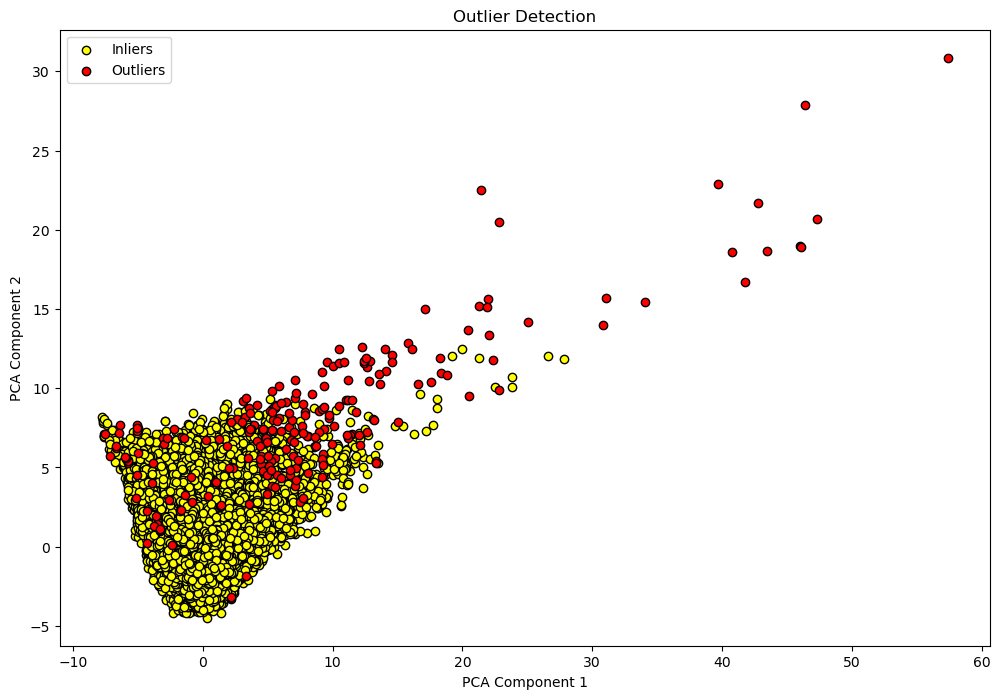

In [ ]:
features = [
    'explicit', 'popularity', 'album_type', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'features_duration_ms', 'time_signature', 'start_of_fade_out', 'tempo_confidence',
    'time_signature_confidence', 'key_confidence', 'mode_confidence', 'n_beats', 'n_bars',
    'popularity_art', 'followers'
]

# filter the DataFrame to only include the selected features
df_features = df_final[features]

# standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

# apply PCA
pca = PCA(n_components=2)  # reduce to 2 components for visualization
pca_result = pca.fit_transform(scaled_features)

# add PCA results to the DataFrame
df_final['pca_one'] = pca_result[:, 0]
df_final['pca_two'] = pca_result[:, 1]

# plot the PCA result and highlight outliers
plt.figure(figsize=(12, 8))

# highlight inliers and outliers
inliers = df_final[df_final['Winner'] == 'inlier']
outliers = df_final[df_final['Winner'] == 'outlier']

plt.scatter(inliers['pca_one'], inliers['pca_two'], c='yellow', edgecolors='black', label='Inliers')
plt.scatter(outliers['pca_one'], outliers['pca_two'], c='red', edgecolors='black', label='Outliers')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Outlier Detection')
plt.legend()
plt.show()

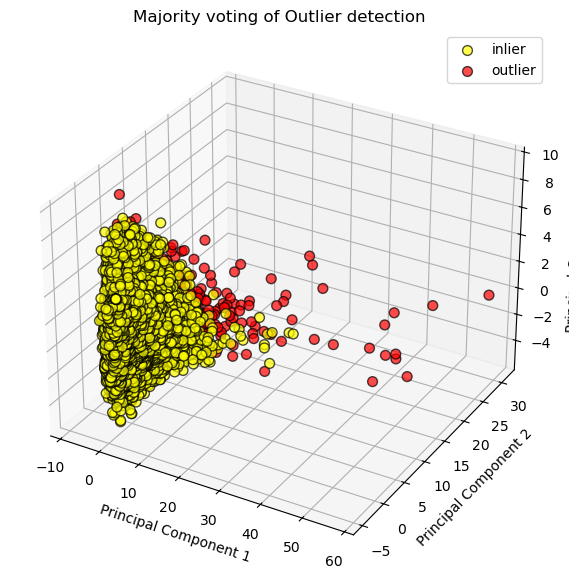

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# define the features
features = [
    'explicit', 'popularity', 'album_type', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
    'features_duration_ms', 'time_signature', 'start_of_fade_out', 'tempo_confidence',
    'time_signature_confidence', 'key_confidence', 'mode_confidence', 'n_beats', 'n_bars',
    'popularity_art', 'followers'
]

# ensure the data is clean and contains no null values
df_final_cleaned = df_final.dropna(subset=features)

# standardize the data
x = df_final_cleaned[features].values
x = StandardScaler().fit_transform(x)

# perform PCA to reduce to 3 components
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2', 'principal component 3'])

# add the 'Winner' column to the principalDf
finalDf = pd.concat([principalDf, df_final_cleaned[['Winner']].reset_index(drop=True)], axis=1)

# plot the 3D PCA
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Majority voting of Outlier detection')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# define colors for inliers and outliers
colors = {'inlier': 'yellow', 'outlier': 'red'}

# plot the points
for key in colors.keys():
    indicesToKeep = finalDf['Winner'] == key
    ax.scatter(
        finalDf.loc[indicesToKeep, 'principal component 1'],
        finalDf.loc[indicesToKeep, 'principal component 2'],
        finalDf.loc[indicesToKeep, 'principal component 3'],
        c=colors[key], edgecolors='black',
        s=50,
        label=key, alpha=0.7
    )

# add legend
ax.legend()
plt.show()

In [213]:
df_without_outliers = df_final.drop(index=df_final[df_final['Winner']=='outlier'].index, axis=0)

In [218]:
no_use_outlier = ['outlier_if', 'outlier_lof', 'outlier_dbscan','outlier_cblof',
       'outlier_KNN','outlier_hbos','outlier_loda','Winner','pca_one','pca_two','outlier_fb',	'outlier_ee']
a = df_without_outliers.drop(no_use_outlier, axis=1)

In [219]:
a.to_csv ('E:\Data Science and Business Informatics\Data Mining (Module II)\df_without_outliers.csv')

In [220]:
a

,explicit,popularity,album_type,danceability,energy,key,loudness,mode,speechiness,acousticness,...,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre,popularity_art,followers
0,0,52,0,0.532,0.517,0,-9.846,1,0.4930,0.54700,...,275.90530,0.020,1.000,0.500,0.525,705.0,234.0,73,51.000000,2.188180e+05
1,0,45,0,0.750,0.340,5,-12.759,0,0.0326,0.16700,...,517.28253,0.678,0.326,0.410,0.589,1074.0,269.0,73,47.000000,2.316130e+05
2,0,39,0,0.801,0.639,7,-10.681,0,0.1040,0.02900,...,259.04180,0.847,0.457,0.904,0.760,516.0,171.0,73,44.000000,1.008280e+05
3,0,0,2,0.675,0.543,6,-11.983,0,0.0639,0.04840,...,387.41360,0.882,0.498,0.512,0.503,826.0,207.0,73,38.000000,1.483065e+05
4,0,0,1,0.761,0.671,11,-13.346,0,0.0418,0.51300,...,239.63574,0.882,1.000,0.474,0.459,493.0,123.0,73,45.000000,2.458390e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89555,1,23,2,0.466,0.982,5,-2.674,0,0.0752,0.00841,...,200.10376,0.729,1.000,0.088,0.182,585.0,145.0,30,71.666667,1.162675e+07
89556,1,56,2,0.666,0.720,9,-4.483,1,0.0269,0.37100,...,200.98611,0.712,1.000,0.395,0.535,339.0,84.0,30,47.000000,4.618400e+04
89557,1,80,0,0.813,0.627,11,-5.018,0,0.0486,0.07710,...,189.48643,0.814,0.990,0.097,0.330,417.0,106.0,30,82.500000,1.517423e+07
89558,0,60,2,0.653,0.779,0,-3.133,1,0.0392,0.37200,...,197.41605,0.650,1.000,0.545,0.604,359.0,89.0,30,42.500000,3.855350e+04


# Test and compare to the old data

## Decision Tree

In [263]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [264]:
X = a.drop(columns=['genre'])
y = a['genre']

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, stratify = y, random_state = 7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((67005, 25), (22336, 25), (67005,), (22336,))

In [266]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

[12, 14, 16, 20, 22]


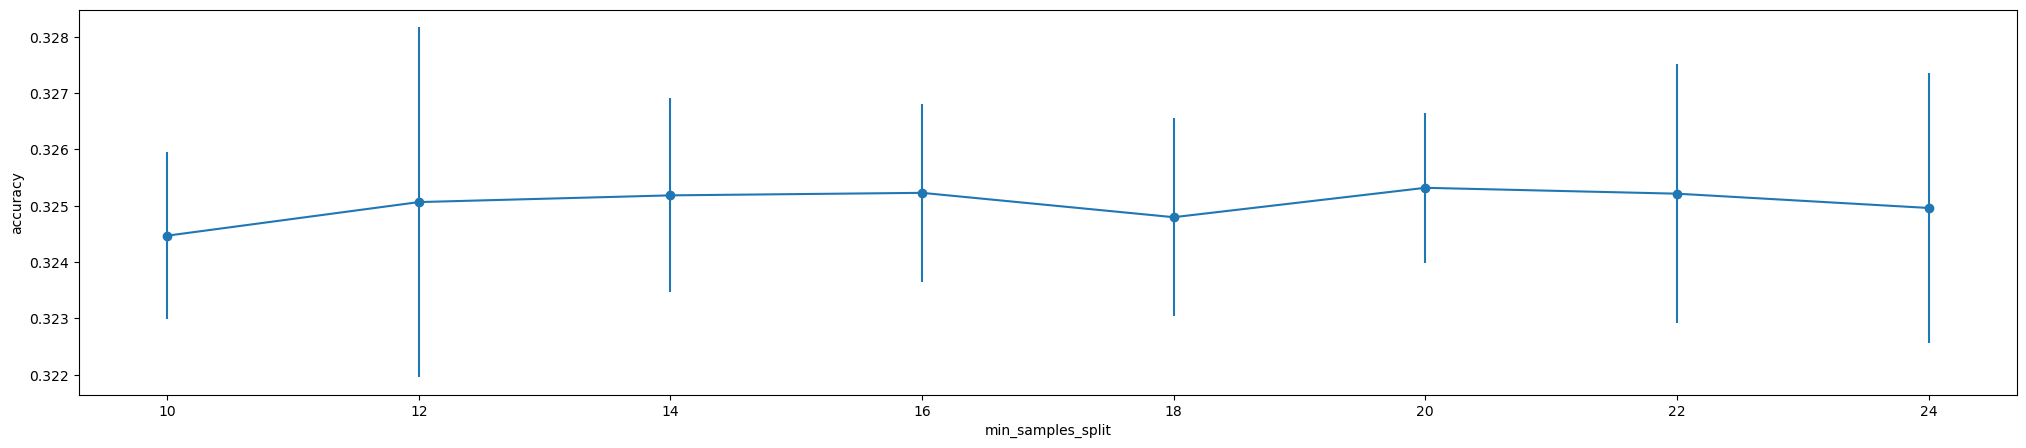

In [267]:
def split_param_graph(interval, train_X, train_y, cv):
  min_samples_splits = interval
  avg_scores = list()
  std_scores = list()
  scores = list()

  for min_samples_split in min_samples_splits:
     dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
     cross_val_scores = cross_val_score(dt, train_X, train_y, cv=cv)
     avg_scores.append(np.mean(cross_val_scores))
     std_scores.append(np.std(cross_val_scores))
     avg_score = np.mean(cross_val_scores)
     std_score = np.std(cross_val_scores)
     scores.append((min_samples_split, avg_score, std_score))

  scores.sort(key=lambda x: x[1], reverse=True)
  range_split = sorted([t[0] for t in scores[:5]])
  print(range_split)

  plt.figure(figsize=(25,5))
  plt.errorbar(range(len(min_samples_splits)), y=avg_scores, yerr=std_scores, marker='o')
  plt.xticks(range(len(min_samples_splits)), min_samples_splits)
  plt.xlabel("min_samples_split")
  plt.ylabel("accuracy")
  plt.show()

  return range_split

range_split = split_param_graph(interval=range(10, 25, 2), train_X=X_train_scaled, train_y=y_train, cv=5)

[5, 6, 7, 8, 9]


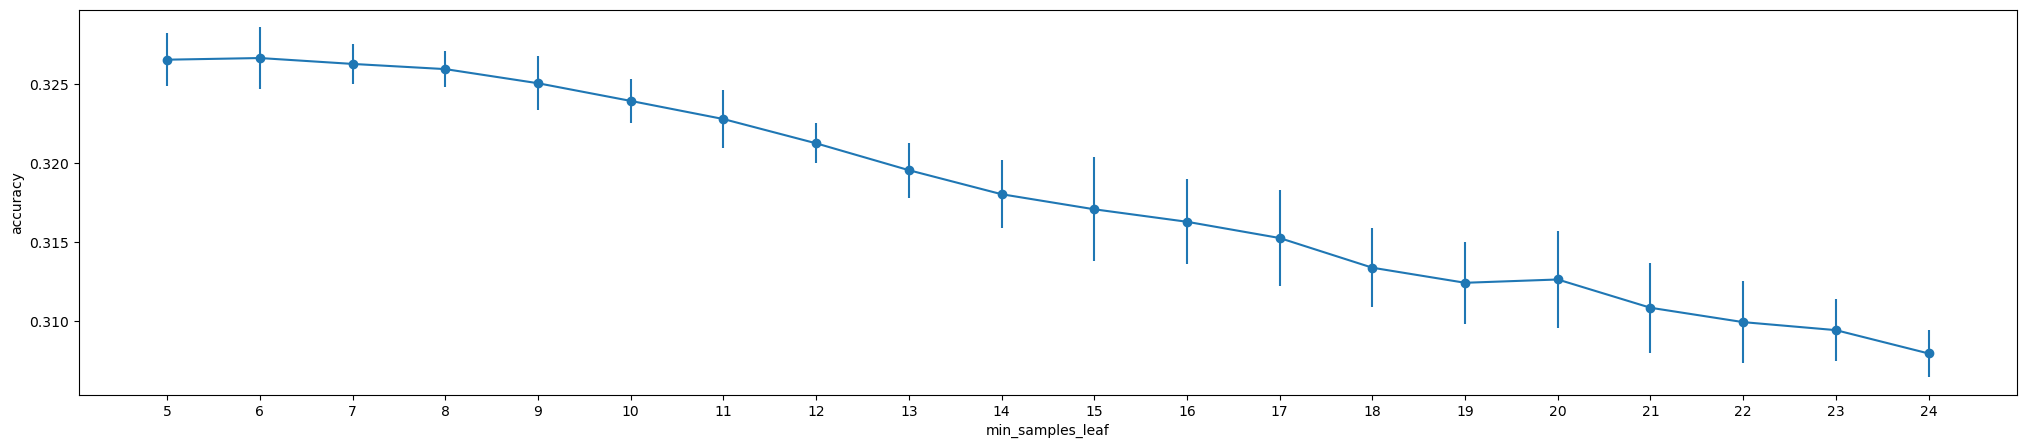

In [268]:
def leaf_param_graph(interval, train_X, train_y, cv):
  min_samples_leafs = interval
  avg_scores = list()
  std_scores = list()
  scores = list()

  for min_samples_leaf in min_samples_leafs:
     dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
     cross_val_scores = cross_val_score(dt, train_X, train_y, cv=cv)
     avg_scores.append(np.mean(cross_val_scores))
     std_scores.append(np.std(cross_val_scores))
     avg_score = np.mean(cross_val_scores)
     std_score = np.std(cross_val_scores)
     scores.append((min_samples_leaf, avg_score, std_score))

  scores.sort(key=lambda x: x[1], reverse=True)
  range_leaf = sorted([t[0] for t in scores[:5]])
  print(range_leaf)

  plt.figure(figsize=(25,5))
  plt.errorbar(range(len(min_samples_leafs)), y=avg_scores, yerr=std_scores, marker='o')
  plt.xticks(range(len(min_samples_leafs)), min_samples_leafs)
  plt.xlabel("min_samples_leaf")
  plt.ylabel("accuracy")
  plt.show()

  return range_leaf

range_leaf = leaf_param_graph(interval=range(5, 25, 1), train_X=X_train_scaled, train_y=y_train, cv=5)

[24, 25, 27, 28, 29]


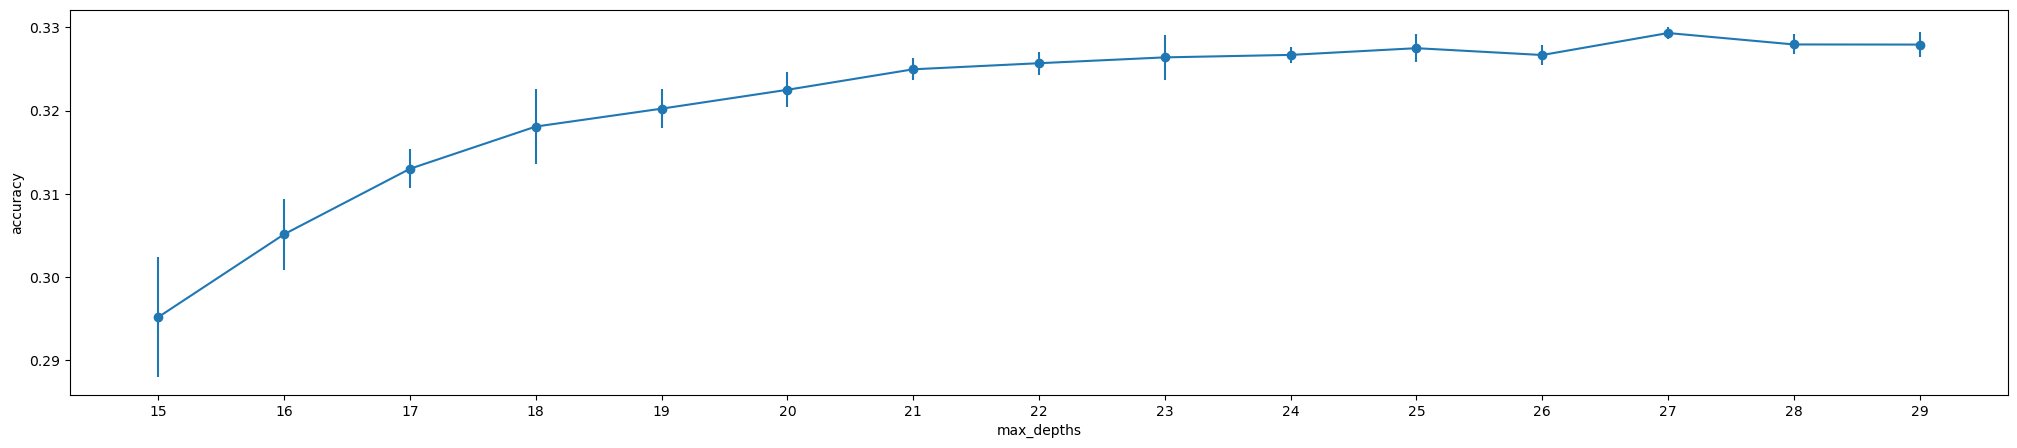

In [269]:
def depth_param_graph(interval, train_X, train_y, cv):
  max_depths = interval
  avg_scores = list()
  std_scores = list()
  scores = list()

  for max_depth in max_depths:
      dt = DecisionTreeClassifier(max_depth=max_depth)
      cross_val_scores = cross_val_score(dt, train_X, train_y, cv=cv)
      avg_scores.append(np.mean(cross_val_scores))
      std_scores.append(np.std(cross_val_scores))
      avg_score = np.mean(cross_val_scores)
      std_score = np.std(cross_val_scores)
      scores.append((max_depth, avg_score, std_score))

  scores.sort(key=lambda x: x[1], reverse=True)
  range_depth = sorted([t[0] for t in scores[:5]])
  print(range_depth)

  plt.figure(figsize=(25,5))
  plt.errorbar(range(len(max_depths)), y=avg_scores, yerr=std_scores, marker='o')
  plt.xticks(range(len(max_depths)), max_depths)
  plt.xlabel("max_depths")
  plt.ylabel("accuracy")
  plt.show()

  return range_depth

range_depth = depth_param_graph(interval=range(15, 30, 1), train_X=X_train_scaled, train_y=y_train, cv=5)

In [270]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# TODO: implement tqdm

param_list = { # based on graphs above
    'max_depth': range_depth,
    'min_samples_split': range_split,
    'min_samples_leaf': range_leaf,
    'criterion': ['gini', 'entropy'],
    'splitter':['best']
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    cv=RepeatedStratifiedKFold(random_state=0),
    refit=True, scoring='accuracy', n_jobs=-1, verbose=10
)


In [271]:
random_search.fit(X_train_scaled, y_train)
dt = random_search.best_estimator_

Fitting 50 folds for each of 10 candidates, totalling 500 fits


In [272]:
dt

DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=7,
                       min_samples_split=14)

In [273]:
clf_dt = DecisionTreeClassifier(criterion='entropy',splitter='best',max_depth=25, min_samples_leaf=7, 
                             min_samples_split=14, random_state=42)
clf_dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=7,
                       min_samples_split=14, random_state=42)

In [274]:
y_pred = clf_dt.predict(X_test_scaled)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, digits=3))

Accuracy 0.34992836676217765
F1-score [0.14920071 0.18115942 0.15151515 0.36138614 0.36259542 0.26666667
 0.48368522 0.30065359 0.21026895 0.17173524 0.31096563 0.23741007
 0.24609375 0.44255319 0.42043222 0.12861736 0.62108262 0.24699828
 0.77432712 0.41541756 0.59770115 0.21374046 0.28275862 0.18543046
 0.5473251  0.20606061 0.4111349  0.3887689  0.17204301 0.08391608
 0.02985075 0.44081633 0.12857143 0.25570776 0.20967742 0.2972028
 0.13122172 0.27760252 0.21002387 0.41690141 0.25344353 0.18536585
 0.71804511 0.3546798  0.53626374 0.31771894 0.4033264  0.38522427
 0.265      0.42239186 0.2890625  0.43496802 0.64876033 0.3372549
 0.34548944 0.17154812 0.47133758 0.27338129 0.31666667 0.86393089
 0.34115139 0.39076377 0.23255814 0.17808219 0.69295775 0.43705463
 0.50309278 0.304      0.         0.17371938 0.22997947 0.35294118
 0.39550562 0.25581395 0.11715481 0.52928416 0.43661972 0.37837838
 0.47111111 0.55131965 0.48351648 0.31111111 0.27249357 0.29370629
 0.38227147 0.33766234 0.2

## KNN

In [275]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
b = KNeighborsClassifier(metric='manhattan', n_neighbors=25, weights='distance')

# fit the classifier to the training data
b.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=25, weights='distance')

In [277]:
y_train_pred_knn = b.predict(X_train_scaled)
y_test_pred_knn = b.predict(X_test_scaled)

In [278]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred_knn))
print('Train F1-score %s' % f1_score(y_train, y_train_pred_knn, average=None))
print()
print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred_knn))
print('Test F1-score %s' % f1_score(y_test, y_test_pred_knn, average=None))

Train Accuracy 0.9991194686963659
Train F1-score [1.         1.         0.99744246 0.99667221 0.99930314 1.
 1.         1.         0.99914457 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.99597315 1.         1.         0.99872935
 1.         0.99893504 1.         1.         1.         1.
 0.98723404 0.99579243 1.         1.         0.99522673 1.
 1.         1.         1.         0.99838188 1.         1.
 1.         1.         1.         0.99924981 1.         1.
 1.         1.         1.         0.99861687 1.         0.99265197
 1.         1.         0.98047722 0.99919936 1.         1.
 1.         1.         0.99931082 1.         0.99817185 1.
 1.         0.97356828 0.99065421 1.         1.         1.
 1.         0.99899497 1.         1.         1.         1.
 0.99853801 0.99724518 0.99661017 1.         1.         1.
 0.99742931 1.         1.         1.         0.9898804  1.
 0.98858075 1.         1.         1.         1.   

In [282]:
print(classification_report(y_test, y_test_pred_knn, digits=3))

              precision    recall  f1-score   support

           0      0.149     0.194     0.169       227
           1      0.291     0.211     0.244       247
           2      0.091     0.031     0.046        65
           3      0.430     0.370     0.398       200
           4      0.396     0.318     0.353       239
           5      0.347     0.193     0.248       181
           6      0.394     0.434     0.413       244
           7      0.321     0.356     0.338       247
           8      0.537     0.226     0.318       195
           9      0.198     0.135     0.161       244
          10      0.296     0.181     0.225       248
          11      0.333     0.084     0.134       143
          12      0.180     0.311     0.228       219
          13      0.346     0.565     0.429       248
          14      0.578     0.464     0.515       248
          15      0.193     0.141     0.163       149
          16      0.689     0.600     0.642       170
          17      0.377    

In [280]:
df['genre']

0        minimal-techno
1        minimal-techno
2        minimal-techno
3        minimal-techno
4        minimal-techno
              ...      
89555               edm
89556               edm
89557               edm
89558               edm
89559           hip-hop
Name: genre, Length: 89560, dtype: object

In [228]:
df['genre'].value_counts()

genre
punk-rock     1000
j-rock        1000
techno        1000
tango         1000
synth-pop     1000
              ... 
british        576
edm            536
deep-house     524
dance          494
dubstep        268
Name: count, Length: 114, dtype: int64